In [1]:
import torch
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import *
from nn_model import BudDataset, LineageNN, train_nn, test_nn, cv_nn



In [13]:
general_model_path = 'bst_nn_all_plus_4frames_10features_[40,64,5].pth'
model = LineageNN([40,64,5])
model.load_state_dict(torch.load(general_model_path))



<All keys matched successfully>

In [14]:
external_subset_lineage_GT_path_edited = '/home/farzaneh/Documents/TrackerTestDataset_SCerevisiae_7/subset/lineage/lineage_budlum_edited_by_code.csv'
external_subset_features_path = '/home/farzaneh/Documents/TrackerTestDataset_SCerevisiae_7/subset/features/features.csv'
threshold_mode = 'count'
num_nn = 4
path_to_features = '/home/farzaneh/Documents/TrackerTestDataset_SCerevisiae_7/subset/lineage/'

external_subset_features = pd.read_csv(os.path.join(
    path_to_features, 'external_subset_candidate_features_{}_{}_nn.csv'.format(threshold_mode, num_nn)))
external_subset_lineage_gt= pd.read_csv(external_subset_lineage_GT_path_edited)

# create matrix features for the external subset
external_subset_matrix_features = get_matrix_features(
    external_subset_features, external_subset_lineage_gt)

parent not in candidates 287 10 [269 207 122  92] -3
parent not in candidates 289 10 [269 207 197  61] -3
parent not in candidates 291 10 [269 207  92 122] -3
parent not in candidates 311 10 [-3 -3 -3 -3] 16
parent not in candidates 312 10 [-3 -3 -3 -3] 15
parent not in candidates 313 10 [-3 -3 -3 -3] 97
parent not in candidates 314 10 [-3 -3 -3 -3] 83
parent not in candidates 315 10 [-3 -3 -3 -3] 7
parent not in candidates 316 10 [-3 -3 -3 -3] 38
parent not in candidates 317 10 [-3 -3 -3 -3] 130
parent not in candidates 318 10 [-3 -3 -3 -3] 159
parent not in candidates 319 10 [-3 -3 -3 -3] 77
parent not in candidates 320 10 [-3 -3 -3 -3] 144
parent not in candidates 322 10 [-3 -3 -3 -3] 209
parent not in candidates 323 10 [-3 -3 -3 -3] 289
parent not in candidates 324 10 [-3 -3 -3 -3] 75
parent not in candidates 325 10 [-3 -3 -3 -3] 58
parent not in candidates 326 10 [-3 -3 -3 -3] 310
parent not in candidates 327 10 [-3 -3 -3 -3] 145
parent not in candidates 328 10 [-3 -3 -3 -3] 287
p

In [15]:
predicted , accuracy = test_nn(model, external_subset_matrix_features)

test accuracy 0.8610169491525423


In [16]:
errors = predicted.loc[predicted['predicted'] != predicted['parent_index_in_candidates']]
errors.drop(columns=['Unnamed: 0'], inplace=True)
errors

/tmp/ipykernel_288933/3931419242.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors.drop(columns=['Unnamed: 0'], inplace=True)


,parent_GT,bud_id,time_index,colony,features,candidates,parent_index_in_candidates,predicted
4,2,5,8,10,"[[1.0, 2.8284271247461903, 1.8341048520519745,...","[2, 3, 1, 4]",0,2
10,3,11,30,10,"[[1.0, 4.123105625617661, 1.712270528122779, 1...","[3, 6, 8, 1]",0,1
13,2,14,36,10,"[[1.0, 1.4142135623730951, 1.5753414179101837,...","[2, 5, 9, 8]",0,3
17,3,18,46,10,"[[1.0, 4.0, 1.5813833707425298, 1.514606954697...","[3, 7, 11, 13]",0,1
26,7,27,54,10,"[[1.0, 2.0, 1.125378394002211, 1.0548030138938...","[7, 12, 15, 11]",0,3
30,14,31,59,10,"[[1.0, 2.0, 1.553578377565639, 1.5230728126607...","[2, 8, 14, 1]",2,0
34,3,35,61,10,"[[1.0, 4.242640687119285, 2.1077621505352258, ...","[3, 7, 18, 13]",0,1
49,28,50,72,10,"[[1.0, 2.8284271247461903, 0.8473542344029821,...","[10, 28, 37, 4]",1,0
52,8,53,74,10,"[[1.0, 2.23606797749979, 0.9119430008430972, 0...","[6, 8, 34, 5]",1,2
72,4,73,82,10,"[[1.0, 3.0, 1.4151014116366218, 1.401251845814...","[4, 33, 37, 69]",0,1


# Plot errors


In [4]:
from bread.vis import *
from bread.data import Features, SegmentationFile, Microscopy

vis = Microscopy.from_tiff('/home/farzaneh/Documents/TrackerTestDataset_SCerevisiae_7/subset/BF/stacked/bf_stack.tif')
seg = SegmentationFile.from_h5('/home/farzaneh/Documents/TrackerTestDataset_SCerevisiae_7/subset/segmentation2/stacked/mask_stack _edited.h5').get_segmentation('FOV0')
feat = Features(seg)
# vis = Microscopy.from_tiff('/home/farzaneh/Documents/Bread/bread/src/bread/tests/data/colonies/colony003_microscopy.tif')
# seg = SegmentationFile.from_h5('/home/farzaneh/Documents/Bread/bread/src/bread/tests/data/colonies/colony003_segmentation.h5').get_segmentation('FOV0')
feat = Features(seg)

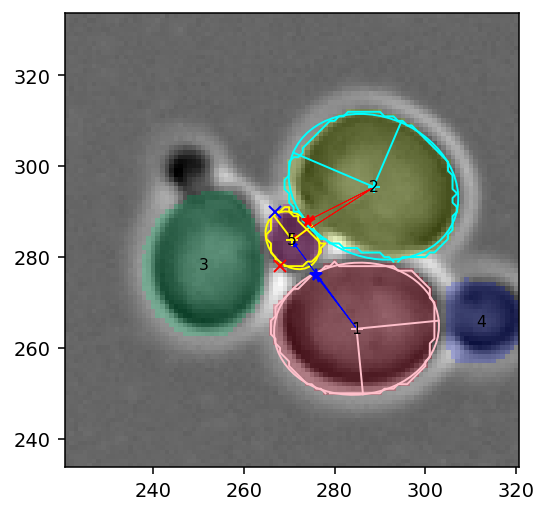

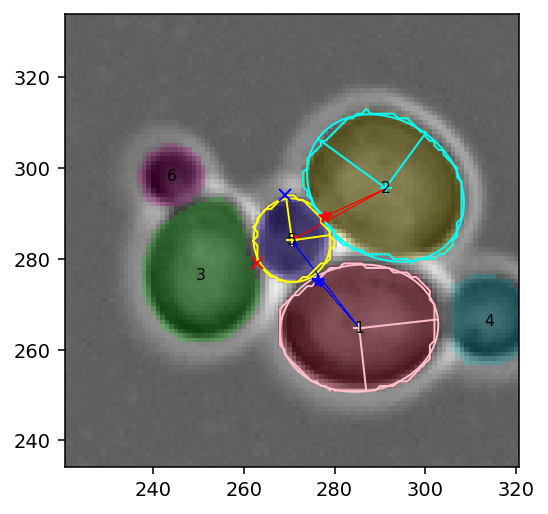

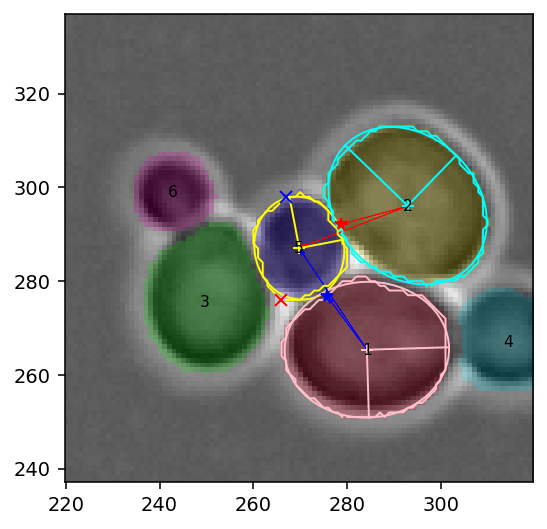

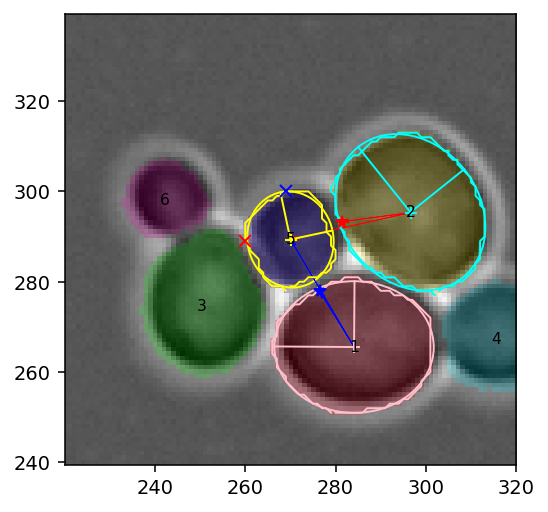

In [8]:
# %matplotlib widget
errors_external_subset_path = 'errors_external_subset/'
plt.close('all')
time_index = 8
bud_id = 5
parent_id = 2
candidates = [1]
# fig , axs = plt.subplots(1,4)
for i, time_id in enumerate(range(time_index,time_index+4)):

    # figax =(fig, sp[1][i])
    figax = None
    figax = plot_visible(vis, time_id, figax=figax)
    figax = plot_segmentation(seg, time_id, cellids=True, figax=figax, alpha=0.2)
    figax = plot_debug_cell(time_id, bud_id, feat, figax=figax, color='yellow')
    figax = plot_debug_cell(time_id, parent_id, feat, figax=figax, color='cyan')
    figax = plot_debug_pair(time_id, bud_id, parent_id, feat, figax=figax, color='red')
    for candid in candidates:
        figax = plot_debug_cell(time_id, candid, feat, figax=figax, color='pink')
        figax = plot_debug_pair(time_id, bud_id, candid, feat, figax=figax, color='blue')


    center = get_center(seg, time_id, bud_id)
    y = center[0]
    x = center[1]

    figax[1].set_xlim((x-50, x+50))
    figax[1].set_ylim((y-50, y+50))
    figax[0].set_dpi(140)

    figax[0].tight_layout() 
    plt.show()

    # plt.savefig(errors_external_subset_path+'error_t{}_b{}_p{}_c{}.png'.format(time_id, bud_id, parent_id, candid))
    
plt.show()

In [9]:
errors.head()

,parent_GT,bud_id,time_index,colony,features,candidates,parent_index_in_candidates,predicted
4,2,5,8,10,"[[1.0, 2.8284271247461903, 1.8341048520519745,...","[2, 3, 1, 4]",0,2
10,3,11,30,10,"[[1.0, 4.123105625617661, 1.712270528122779, 1...","[3, 6, 8, 1]",0,1
13,2,14,36,10,"[[1.0, 1.4142135623730951, 1.5753414179101837,...","[2, 5, 9, 8]",0,3
17,3,18,46,10,"[[1.0, 4.0, 1.5813833707425298, 1.514606954697...","[3, 7, 11, 13]",0,1
26,7,27,54,10,"[[1.0, 2.0, 1.125378394002211, 1.0548030138938...","[7, 12, 15, 11]",0,3


In [5]:
def plot_features_and_save(vis,seg,time_index, bud_id, parent_id, candid_id, colony_id, save_path):
    light_green = '#90EE90'
    for i, time_id in enumerate(range(time_index,time_index+8)):
        plt.close('all')
        figax = None
        figax = plot_visible(vis, time_id, figax=figax)
        figax = plot_segmentation(seg, time_id, cellids=True, figax=figax, alpha=0.2, cell_list=[bud_id, parent_id, candid_id])
        figax = plot_debug_cell(time_id, bud_id, feat, figax=figax, color='yellow')
        figax = plot_debug_cell(time_id, parent_id, feat, figax=figax, color=light_green)
        figax = plot_debug_pair(time_id, bud_id, parent_id, feat, figax=figax, color='pink')
        # PLOT CANDIDATES
        figax = plot_debug_cell(time_id, candid_id, feat, figax=figax, color='red')
        figax = plot_debug_pair(time_id, bud_id, candid_id, feat, figax=figax, color='cyan')

        center = get_center(seg, time_id, bud_id)
        y = center[0]
        x = center[1]

        figax[1].set_xlim((x-50, x+50))
        figax[1].set_ylim((y-50, y+50))
        figax[0].set_dpi(140)

        figax[0].tight_layout() 

        plt.savefig(save_path+'error_c{}_bud{}_parent{}_predicted{}_t{}.png'.format(colony_id, bud_id, parent_id, candid_id, time_id))
    

In [12]:
errors

NameError: name 'errors' is not defined

Index 120 out of range for fov FOV0 with 120 frames.
error in plotting for bud_id 262 and time_id 114
index 120 is out of bounds for axis 0 with size 120
Index 120 out of range for fov FOV0 with 120 frames.
error in plotting for bud_id 271 and time_id 116
index 120 is out of bounds for axis 0 with size 120
Index 120 out of range for fov FOV0 with 120 frames.
error in plotting for bud_id 272 and time_id 116
index 120 is out of bounds for axis 0 with size 120
Index 120 out of range for fov FOV0 with 120 frames.
error in plotting for bud_id 279 and time_id 116
index 120 is out of bounds for axis 0 with size 120
Index 120 out of range for fov FOV0 with 120 frames.
error in plotting for bud_id 280 and time_id 117
index 120 is out of bounds for axis 0 with size 120
Index 120 out of range for fov FOV0 with 120 frames.
error in plotting for bud_id 283 and time_id 117
index 120 is out of bounds for axis 0 with size 120
Index 120 out of range for fov FOV0 with 120 frames.
error in plotting for b

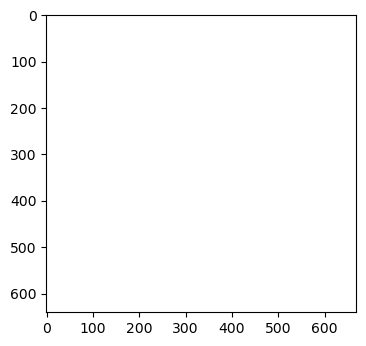

In [14]:
errors_external_subset_path = 'errors_external_subset/'

for i, error in errors.iterrows():
    # if i >90:
    #     break
    parent_id = error['parent_GT']
    bud_id = error['bud_id']
    colony_id = error['colony']
    time_id = error['time_index']
    candidates = error['candidates']
    candid_id = candidates[error['predicted']]
    try:
        plot_features_and_save(time_id, bud_id, parent_id, candid_id, colony_id, errors_external_subset_path)
    except Exception as e:
        print('error in plotting for bud_id ' + str(bud_id)+ ' and time_id ' + str(time_id))
        print(e)
        continue
print('done')   

# same thing for new model with 16 features


In [3]:
model_path = '/home/farzaneh/Documents/Bread/bread/src/bread/tests/saved_models/best_model_on_external_seed0_[64, 64, 5]_lr0.01_b256_.pth'
model = LineageNN([64,64,5])
model.load_state_dict(torch.load(model_path))

<All keys matched successfully>

In [7]:
external_subset_lineage_GT_path_edited = '/home/farzaneh/Documents/TrackerTestDataset_SCerevisiae_7/subset/lineage/lineage_budlum_edited_by_code.csv'
external_subset_features_path = '/home/farzaneh/Documents/TrackerTestDataset_SCerevisiae_7/subset/lineage/external_subset_candidate_features_count_4_nn_19_features.csv'
threshold_mode = 'count'
num_nn = 4


external_subset_features = pd.read_csv(external_subset_features_path)
external_subset_lineage_gt= pd.read_csv(external_subset_lineage_GT_path_edited)

In [8]:
import pathlib
save_path = '/home/farzaneh/Documents/Bread/bread/src/bread/tests/saved_models'
save_path = pathlib.Path(save_path)
model = LineageNN([64,64,5]) 
f_list = ['dist_0','dist_std','poly_fit_budcm_budpt','poly_fit_expansion_vector','position_bud_std','position_bud_max','position_bud_min','position_bud_last','position_bud_first','orientation_bud_std','orientation_bud_max','orientation_bud_min','orientation_bud_last','orientation_bud_first','orientation_bud_last_minus_first','plyfit_orientation_bud']
external_subset_matrix_features = get_custom_matrix_features(
    external_subset_features, external_subset_lineage_gt, f_list)
file = '/home/farzaneh/Documents/Bread/bread/src/bread/algo/lineage/saved_models/best_nn_all_4frames_16features_seed9_[64, 64, 5]_lr0.01_b256.pth'
model.load_state_dict(torch.load(file))
model.eval()
pred, accuracy = test_nn(model, external_subset_matrix_features)

test accuracy 0.8135593220338984


In [ ]:
new_errors = pred.loc[pred['predicted'] != pred['parent_index_in_candidates']].reset_index(drop=True).drop(columns=['Unnamed: 0'])

new_errors

# same thing for internal data


In [43]:
path_to_all_candidate_features = '/home/farzaneh/Documents/Bread/bread/src/bread/tests/data/all_candid_features_count_4_nn_10_threshold_19_features.csv'
path_to_liniage_all = '/home/farzaneh/Documents/Bread/bread/src/bread/tests/data/all_gt.csv'
all_lineage_gt = pd.read_csv(path_to_liniage_all)
all_features = pd.read_csv(path_to_all_candidate_features)
all_lineage_gt
model = LineageNN([64,64,5]) 
f_list = ['dist_0','dist_std','poly_fit_budcm_budpt','poly_fit_expansion_vector','position_bud_std','position_bud_max','position_bud_min','position_bud_last','position_bud_first','orientation_bud_std','orientation_bud_max','orientation_bud_min','orientation_bud_last','orientation_bud_first','orientation_bud_last_minus_first','plyfit_orientation_bud']
all_matrix_features = get_custom_matrix_features(
    all_features, all_lineage_gt, f_list)
file = '/home/farzaneh/Documents/Bread/bread/src/bread/algo/lineage/saved_models/best_nn_all_4frames_16features_seed9_[64, 64, 5]_lr0.01_b256.pth'
model.load_state_dict(torch.load(file))
model.eval()
pred, accuracy = test_nn(model, all_matrix_features)

test accuracy 0.8062953995157385


In [34]:
all_lineage_gt

,Unnamed: 0,parent_GT,bud_id,time_index,colony
0,0,-1,1,0,1
1,1,-1,2,0,1
2,2,2,3,4,1
3,3,1,4,7,1
4,4,4,5,27,1
...,...,...,...,...,...
867,867,91,364,146,0
868,868,132,365,146,0
869,869,111,366,146,0
870,870,224,367,146,0


In [28]:
internal_errors = pred.loc[pred['predicted'] != pred['parent_index_in_candidates']]
internal_errors.reset_index(drop=True).drop(columns=['Unnamed: 0'])

,parent_GT,bud_id,time_index,colony,features,candidates,parent_index_in_candidates,predicted
0,10,22,95,1,"[[2.23606797749979, 0.3773791569830836, 2.0405...","[10, 4, 9, 15]",0,2
1,17,31,108,1,"[[2.23606797749979, 0.2961795736232002, 3.3429...","[5, 17, 19, 16]",1,2
2,1,32,110,1,"[[2.23606797749979, 0.1022204327674156, 2.8264...","[12, 1, 2, 14]",1,0
3,8,34,112,1,"[[6.324555320336759, 1.5686980018529657, 3.037...","[8, 14, 13, 2]",0,2
4,7,35,113,1,"[[6.0, 1.6069957942421398, 2.555680539637577, ...","[9, 15, 7, 22]",2,0
...,...,...,...,...,...,...,...,...
155,60,336,143,0,"[[2.23606797749979, 0.2564990348397348, 2.0418...","[5, 103, 156, 60]",3,0
156,127,345,144,0,"[[1.0, 1.4610695952855923, 5.362913950903071, ...","[127, 95, 229, 198]",0,3
157,11,352,144,0,"[[2.0, 0.8660254037844386, 4.279388983541511, ...","[281, 11, 24, 193]",1,2
158,90,353,145,0,"[[2.23606797749979, 1.0623008075046598, 4.0821...","[96, 227, 202, 90]",3,0


In [42]:
errors_internal_path = 'errors_inetrnal_sample/'
vis = Microscopy.from_tiff('/home/farzaneh/Documents/Bread/bread/src/bread/tests/data/colonies/colony005_microscopy.tif')
seg = SegmentationFile.from_h5('/home/farzaneh/Documents/Bread/bread/src/bread/tests/data/colonies/colony005_segmentation.h5').get_segmentation('FOV0')
feat = Features(seg)

for i, error in internal_errors.iterrows():
    parent_id = error['parent_GT']
    bud_id = error['bud_id']
    colony_id = error['colony']
    time_id = error['time_index']
    candidates = error['candidates']
    candid_id = candidates[error['predicted']]
    if(colony_id!= 5 or bud_id not in [i*5 for i in range(1, 50)]):
        continue
    try:
        plot_features_and_save(time_id, bud_id, parent_id, candid_id, colony_id, errors_internal_path)
    except Exception as e:
        print('error in plotting for bud_id ' + str(bud_id)+ ' and time_id ' + str(time_id))
        print(e)
        continue
print('done') 

done
